In [46]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
Pkg.add("XLSX")
Pkg.add("CSV")


  Activating project at `~/Desktop/BEE 4750/BEE4750FinalProject-1`
   Resolving package versions...
  No Changes to `~/Desktop/BEE 4750/BEE4750FinalProject-1/Project.toml`
  No Changes to `~/Desktop/BEE 4750/BEE4750FinalProject-1/Manifest.toml`
   Resolving package versions...
    Updating `~/Desktop/BEE 4750/BEE4750FinalProject-1/Project.toml`
  [336ed68f] + CSV v0.10.15
    Updating `~/Desktop/BEE 4750/BEE4750FinalProject-1/Manifest.toml`
  [336ed68f] + CSV v0.10.15
  [48062228] + FilePathsBase v0.9.24
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1


In [47]:
using JuMP
using HiGHS
using DataFrames
using GraphRecipes
using Plots
using Measures
using MarkdownTables
using XLSX
using CSV

Load Data for all buildings

In [55]:
using CSV, DataFrames

# Read the CSV file into a DataFrame
df = CSV.read("HuShihHall.csv", DataFrame)

# Access a column by its exact name (String)
date = df."Date"[1:366]
hushih_chilled_water = df."Chilled Water (tons)"[1:366]
hushih_hot_water     = df."Hot Water (kBTU/hr)"[1:366]
hushih_electric      = df."Electric (kW)"[1:366]
hushih_solar         = df."Solar (kW)"[1:366]

# Alternatively, access a column using a Symbol (which is often faster internally)
#my_column_data_symbol = df[:ColumnName]


366-element Vector{Union{Missing, Float64}}:
 14.50422677
  4.221198229
  8.695046875
 11.346255312
  3.980920729
  0.016338229
  0.07193302
  0.029042395
  8.603532708
  7.717053333
  ⋮
  0.053068333
  0.191975894
  0.347770208
  1.121165729
 14.940252187
  6.0367775
 10.290919687
 18.117440729
  2.497909791

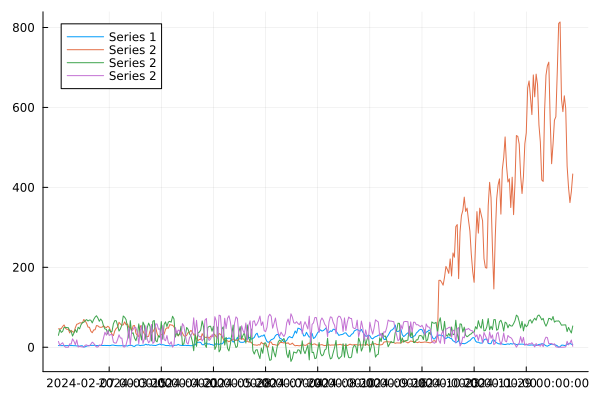

In [57]:
# Start the first plot and store it in a variable 'p'
p = plot(date, hushih_chilled_water, label="Series 1")

# Add the second line to the existing plot 'p' using plot!()
plot!(p, date, hushih_hot_water, label="Series 2")
plot!(p, date, hushih_electric, label="Series 2")
plot!(p, date, hushih_solar, label="Series 2")

# Display the final plot
display(p)

In [ ]:
using Plots, Dates
# Make sure you have Dates loaded from Julia's standard library
# and Plots installed (Pkg.add("Plots"))

# Assume 'date_strings' is your original vector of strings, like ["2024-01-01", ...]
# and 'values' is your corresponding vector of numeric data.

# Example Data Setup (replace with your actual data):
num_days = 365
date_strings = [string(Date(2024, 1, 1) + Day(i)) for i in 0:(num_days-1)]
values = rand(num_days) * 100

# *** THE CRUCIAL STEP: Convert strings to Date objects ***
dates = Date.(date_strings)

# Create the plot
plot(dates, values, 
     legend=false, 
     xlabel="Date", 
     ylabel="Energy Use",
     title="Daily Energy Use Over One Year",
     lw=1.5, # Line width
     xticks=:auto # This is key: let Plots.jl decide sensible tick marks
)

